# Report_T4_Group_6



## 1. Sound Source Localization

### R.1.1

There are two main approaches to determine the azimuth angle, namely, Interaural Time DIfference(ITD) and Interaural Level Difference(ILD).

To determine the azimuth angle with ITD, we assume the sound source is far enough and therefore the sound waves are parallel, as shown below.
![R_1_1.png](./R_1_1.png)

Assume the sound speed is $c$, the distance between left and right ear is $l$, the line segement $RA$ starting from $A$ is perpendicular to $LA$. The distance difference between the sound source to R and the sound source to L is exactly the line segement $LA$, and the length is $c\Delta t$. The degree of azimuth angle is as same as $\angle ARL$. $\sin \theta = \frac{LR}{l} = \frac{c\Delta t}{l}$



We cannot simply derive a ILD explicitly. What we know is that the proportion of the amplitude of sound at left ear $A_L$ and the at right ear $A_R$ is inverse proportional to the distance between the sound source to the left ear over the distance to the right ear. And we can approximately say the proportion of $d_R$ and $d_L$ is proportional to $\sin\theta$ I.e, $\frac{A_L}{R_L}\propto \frac{d_R}{d_L}\propto \sin(\theta)$. After adding a scaling factor $K$ to $\sin\theta$ and a real number $1$ to the equation to ensure that when $\theta = 0$,$\frac{A_L}{R_L} = 1$ ,the equation is obtained. 

### R.1.2

We can use $Δf = \frac{2Δv}{c}f_0 $ to determine the velocity of a target, 

where, 

Δf is the frequency shift of the radar signal,

Δv is the velocity difference between the radar and the target,

f_0 is the carrier frequency of the radar signal,

c is the speed of light.

The equation is derived from Doppler effect $f = \frac{c\pm v_r}{c\pm v_s}f_0$,

where

$c$ is the propagation speed of waves in the medium;

$v_r$ is the speed of the receiver relative to the medium, added to 
$c$ if the receiver is moving towards the source, subtracted if the receiver is moving away from the source;


$v_s$ is the speed of the source relative to the medium, added to 
$c$ if the source is moving away from the receiver, subtracted if the source is moving towards the receiver.

We divide the equation for $c$ 

$f = (\frac{1+\frac{v_r}{c}}{1+\frac{v_s}{c}}f_0) = (1+\frac{v_r}{c})(\frac{1}{1+\frac{v_s}{c}}f_0)$

If the speeds $v_s$ and $v_r$ are small compared to the speed of the wave, $\frac{v_sr}{c}$ and $\frac{v_s}{c}$ $\ll1$,

then, $\frac{1}{1+\frac{v_s}{c}}\approx 1 - \frac{v_s}{c}$. Assume $v_r = 0$, then $\Delta v = - v_s$, and thus $f = (1+\frac{\Delta v}{c}f_0)$, and therefore $Δf = \frac{2Δv}{c}f_0$



### R.1.3

We can use Ultrasonic Sensors or LIDAR

### R.1.4
We can use Radar based on Doppler effect.

## 2. Fast Fourier Transform

### T.2.1

In [22]:
# import
import numpy as np
import matplotlib.pyplot as plt
import math

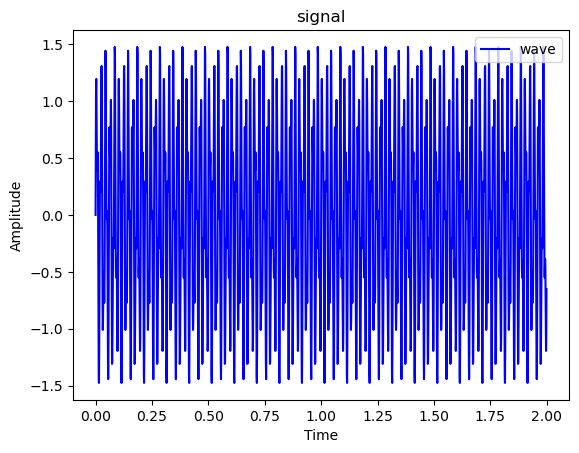

In [23]:
SAMPLE_RATE = 1000  # sampling frequency (Hz)
DURATION = 2  # Seconds

def generate_sine_wave(freq, sample_rate, duration, amplitude):
    t = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    # 2pi because np.sin takes radians
    y = amplitude * np.sin((2 * np.pi) * freq * t)
    return t, y

# Generate a 50 hertz sine wave that lasts for 2 seconds
t, wave1 = generate_sine_wave(50, SAMPLE_RATE, DURATION, 1)
# Generate a 120 hertz sine wave that lasts for 2 seconds
t, wave2 = generate_sine_wave(120, SAMPLE_RATE, DURATION, 0.5)

#add two waves 
wave = wave1 + wave2 
plt.plot(t,wave,'b', label = 'wave') # plot wave with legend name wave
plt.legend(loc='upper right')# set legend location
plt.title('signal') # title of the figure
plt.xlabel('Time') # x label
plt.ylabel('Amplitude') # y label
plt.show()

### T.2.2

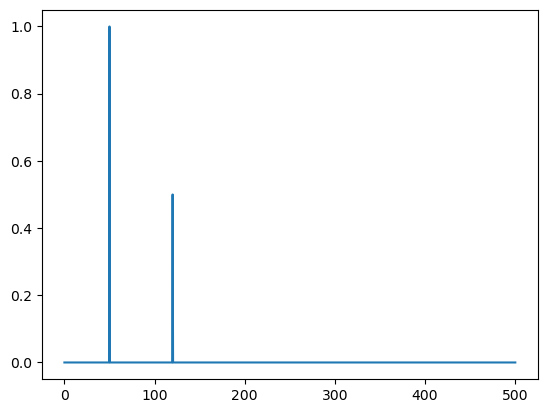

In [24]:
from scipy.fft import rfft, rfftfreq

# Number of samples
N1 = SAMPLE_RATE * DURATION

# perform fft 
yf = rfft(wave,norm="forward")
# normalize the fft
yf = 2 * yf

# a DC part do not need to be multiplied by 2
yf[0] = yf[0]/2


xf = rfftfreq(N1, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

### T.2.3

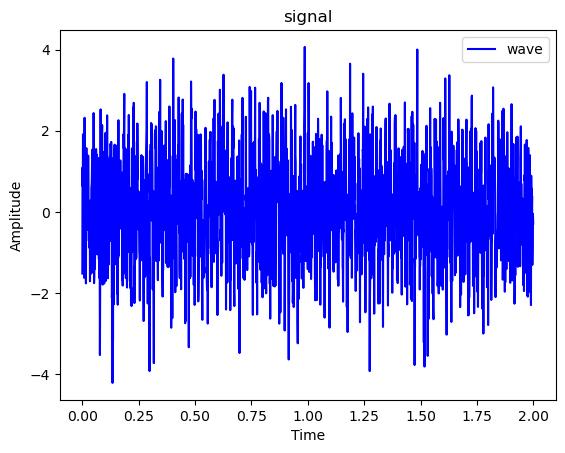

In [25]:
noise = noise = np.random.normal(0, 1, len(wave))
signal = wave + noise
plt.plot(t,signal,'b', label = 'wave') # plot wave with legend name wave
plt.legend(loc='upper right')# set legend location
plt.title('signal') # title of the figure
plt.xlabel('Time') # x label
plt.ylabel('Amplitude') # y label
plt.show()

### T.2.4

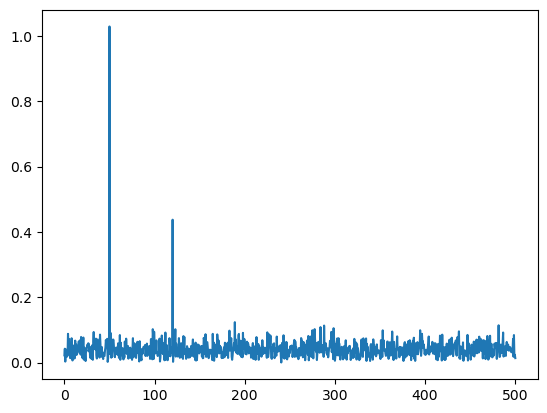

In [26]:
# Number of samples
N2 = SAMPLE_RATE * DURATION

# perform fft
SIGNAL = rfft(signal,norm="forward")
# normalize the fft
SIGNAL = 2 * SIGNAL
SIGNAL[0] = SIGNAL[0]/2
SIG_F = rfftfreq(N2, 1 / SAMPLE_RATE)

plt.plot(SIG_F, np.abs(SIGNAL))
plt.show()

### R.2.1

Yes and no. We need the number of Samples to compute the x-axis of the plot of the FFT. But if we define a buffer and continuously compute FFT after recieving every certain length of data, then it is possible to implement FFT to an online data streaming in some sense.

### R.2.2
We can use FFT in spectrum analysis and differentiate all frequencies of waves. After that, we can use filters to filter some certain noise signals.

### R.2.3
The codes are provided above.

## 3. Audio Correlation

### T.3.1

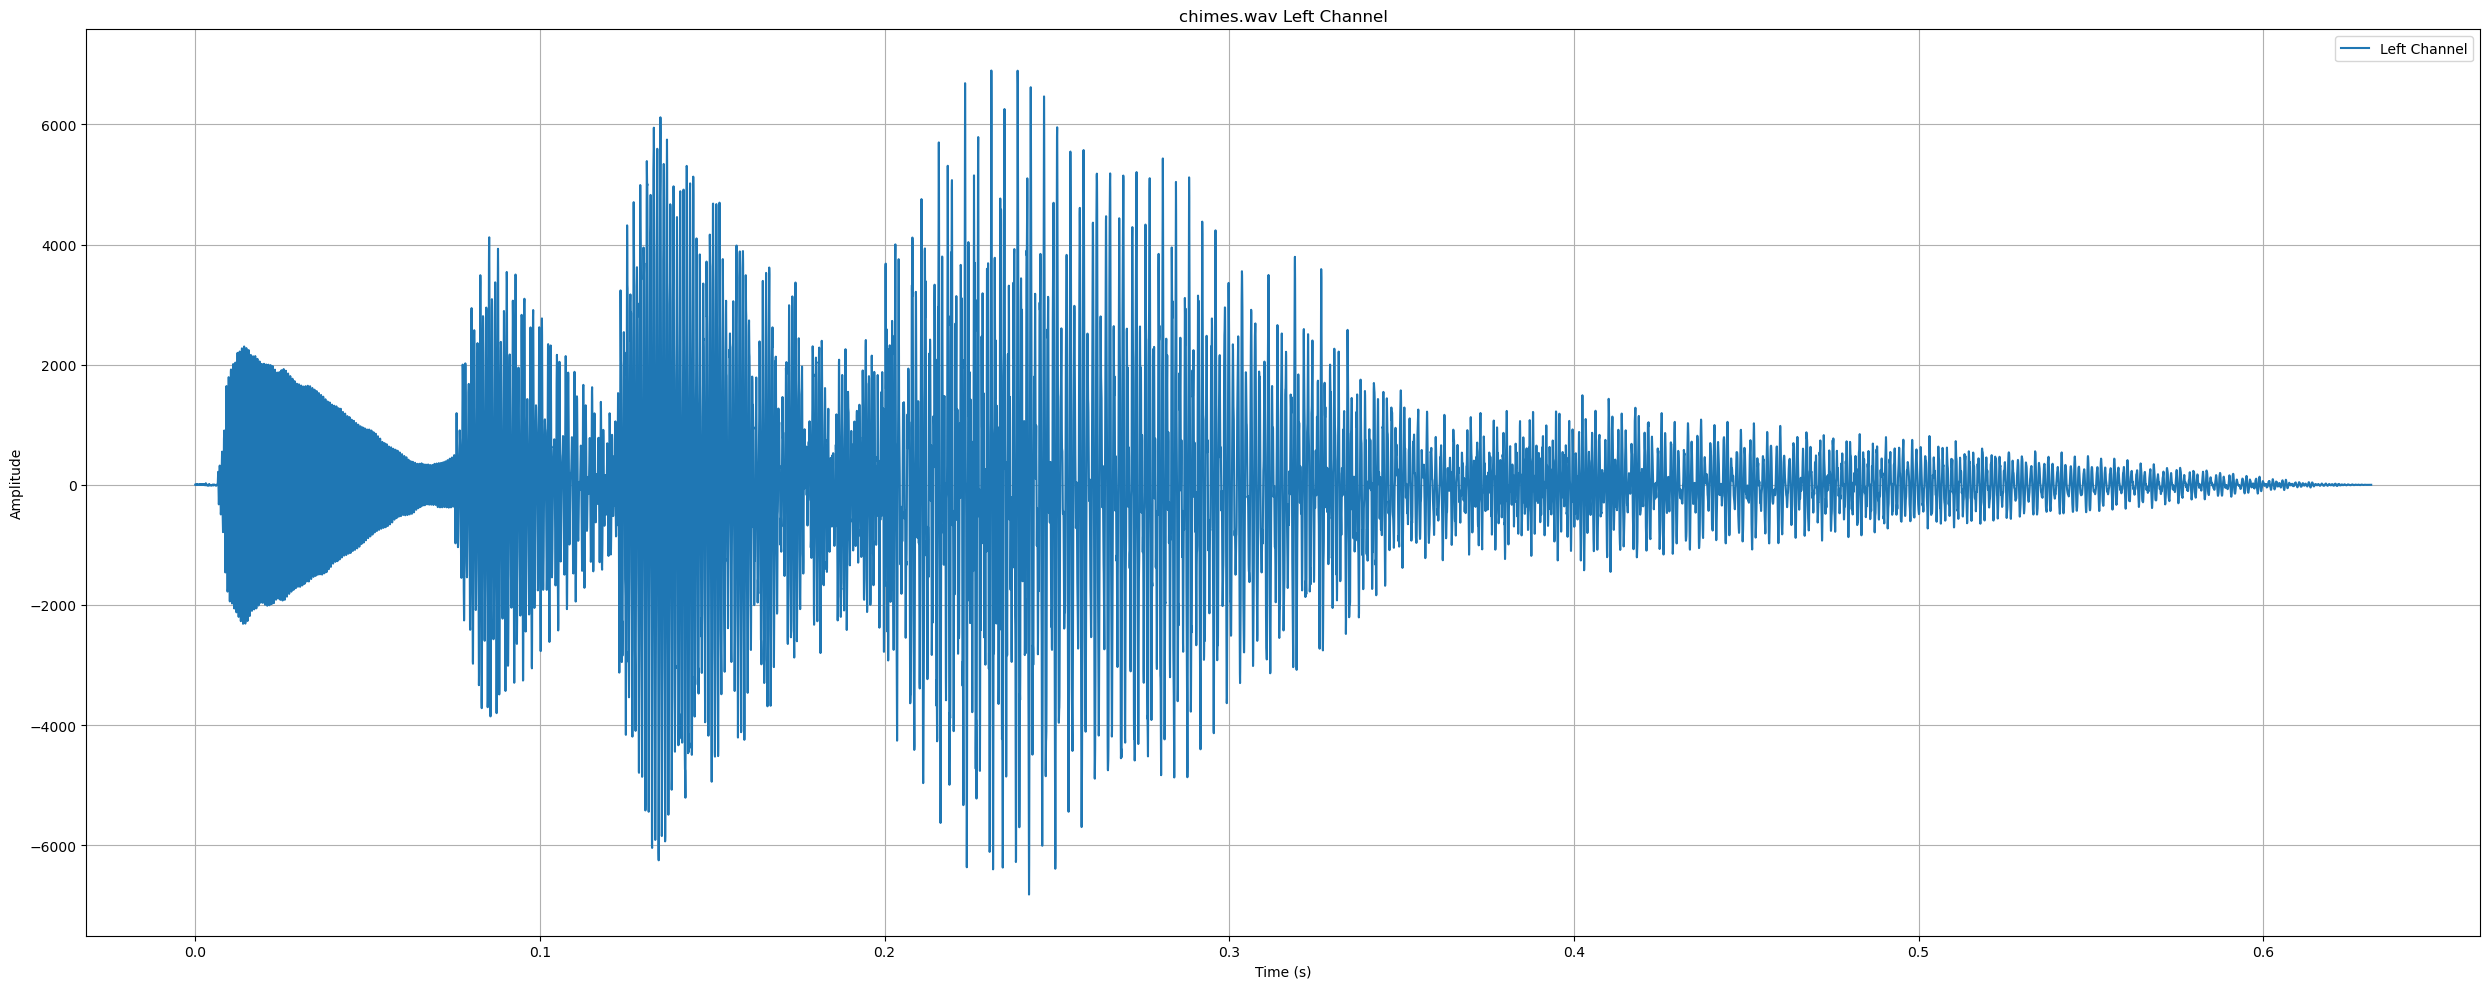

In [56]:
import wave

# # read wave
# wav_obj = wave.open('chimes.wav', 'rb')

# sample_freq = wav_obj.getframerate() # sample freq
# n_samples = wav_obj.getnframes()  # number of samples
# t_audio = n_samples/sample_freq  # length of audio in seconds
# n_channels = wav_obj.getnchannels() # number of channels

# # get amplitude of the wave
# signal_wave = wav_obj.readframes(n_samples)  # read the entire autdio data from the WAV file
# signal_array = np.frombuffer(signal_wave, dtype=np.int16) # convert the audio data to a numpy array
# l_channel = signal_array[0::2] #  every other element, starting at index 0
# r_channel = signal_array[1::2] #  every other element, starting at index 1
# times = np.linspace(0, n_samples/sample_freq, num=n_samples)
# plt.figure(figsize=(15, 5))
# plt.plot(times, l_channel)
# plt.title('Left Channel')
# plt.ylabel('Signal Value')
# plt.xlabel('Time (s)')
# plt.xlim(0, t_audio)
# plt.show()

# Open the WAV file
with wave.open('chimes.wav', 'rb') as wav_file:
    # Get the number of channels in the WAV file
    num_channels = wav_file.getnchannels()

    # Get the sample width in bytes
    sample_width = wav_file.getsampwidth()

    # Get the sample rate in Hz
    sample_rate = wav_file.getframerate()

    # Get the total number of frames in the WAV file
    num_frames = wav_file.getnframes()

    # Read the entire audio data from the WAV file
    audio_data = wav_file.readframes(num_frames)
    
# Convert the audio data to a numpy array
audio_np = np.frombuffer(audio_data, dtype=np.int16)

# Reshape the numpy array based on the number of channels
audio_np = audio_np.reshape(-1, num_channels)

# Separate the left and right channels
l_channel = audio_np[:, 0]
r_channel = audio_np[:, 1]

# Create a time axis
time = np.arange(len(l_channel)) / sample_rate

# Plot the left and modified right channels
plt.figure(figsize=(25, 10))
plt.plot(time, l_channel, label='Left Channel')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('chimes.wav Left Channel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### T.3.2

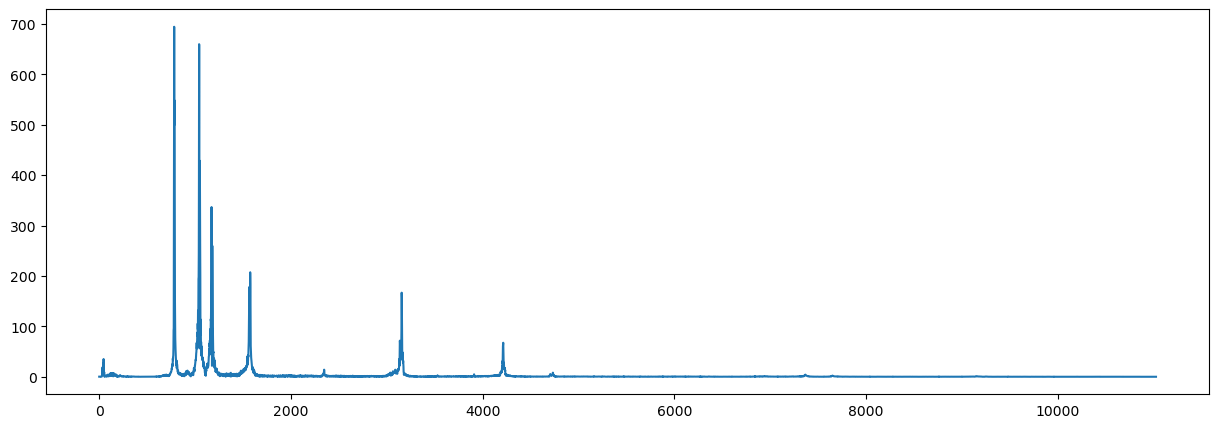

In [47]:
# perform fft
L_CHANNEL = rfft(l_channel,norm="forward")
# normalize the fft
L_CHANNEL = 2 * L_CHANNEL
L_CHANNEL[0] = L_CHANNEL[0]/2
L_F = rfftfreq(n_samples, 1 / sample_freq)

plt.figure(figsize=(15, 5))
plt.plot(L_F, np.abs(L_CHANNEL))
plt.show()


# # Perform the FFT on the left channel
# L_CHANNEL = np.fft.rfft(l_channel)
# left_magnitude = np.abs(L_CHANNEL)



# # Calculate the corresponding positive frequencies
# freq_bins = np.fft.rfftfreq(len(l_channel), 1 / sample_freq)


# # Normalize the FFT magnitudes to 1
# left_magnitude_normalized = left_magnitude / len(l_channel)
# left_magnitude_normalized *= 2
# left_magnitude_normalized[0] /=2

# plt.figure(figsize=(10, 4))
# plt.plot(freq_bins, left_magnitude_normalized, label='Left Channel')

# # plt.plot(freq_bins, right_magnitude_normalized, label='Right Channel')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude (Normalized)')
# plt.title('FFT Spectrum')
# plt.grid(True)
# plt.legend()
# plt.show()

### T.3.3

In [90]:
# already have l_channel and r_channel
# generate a delayed and scaled r_channel
delay = 0.1 # time(s)
scaling = 0.5
delay_samples = int(delay * sample_freq)
r_channel_delayed = np.concatenate((np.zeros(delay_samples), r_channel[:-delay_samples]))
r_channel_modified = scaling * r_channel_delayed

#times_r_ = np.linspace(delay, n_samples/sample_freq+delay, num=n_samples)
time = np.arange(len(l_channel)) / sample_freq
import math
#zeros = np.zeros(math.ceil(delay * sample_freq))
#r_channel_d = np.append(zeros, r_channel_)
#l_channel_d = np.append(l_channel, zeros)
#times_r_d = np.append(zeros, times_r_)

### T.3.4

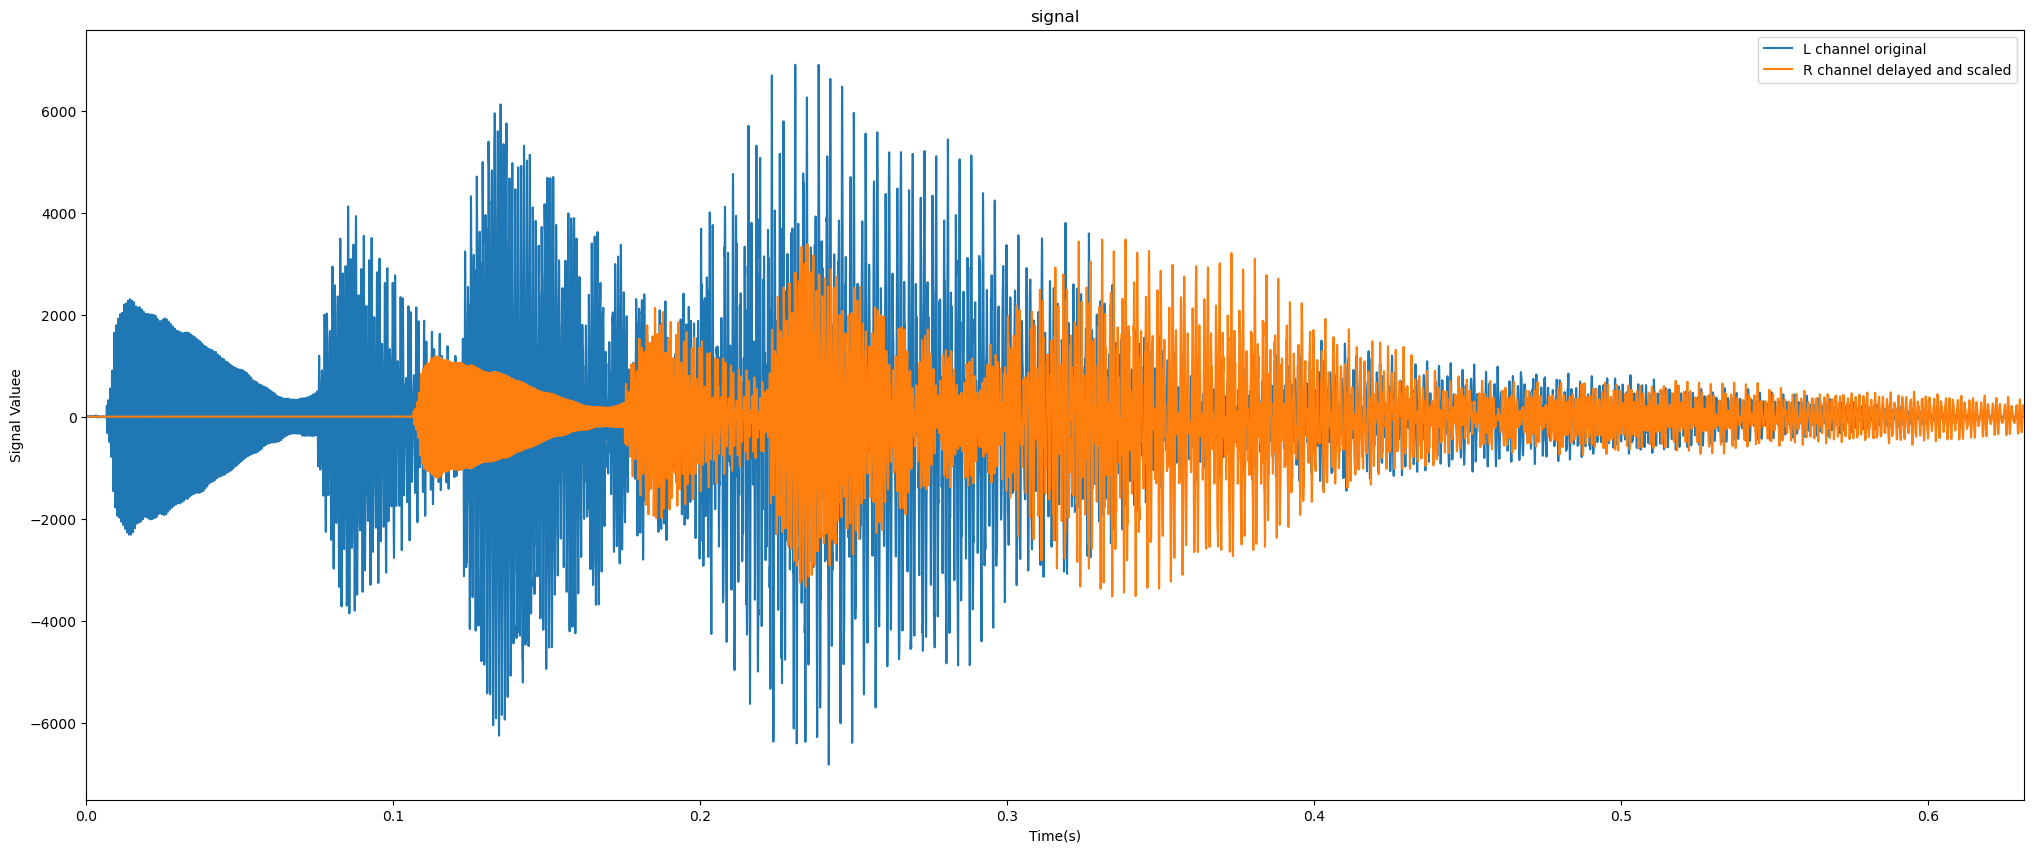

In [91]:
# plot
plt.figure(figsize=(25, 10))

plt.plot(time, l_channel, label = 'L channel original')
plt.plot(time, r_channel_modified, label = 'R channel delayed and scaled')
plt.legend(loc='upper right')# set legend location
plt.title('signal') # title of the figure
plt.xlabel('Time(s)') # x label
plt.ylabel('Signal Valuee') # y label
plt.xlim(0, t_audio)
plt.show()

### T.3.5

The scaling factor might have significant influence on stereo locolization. When we set the scaling to 1 and remain the delay, the voice sounds like go through from one side to another. When we only take the scaling factor into account, the voice can be clearly located. 

In [92]:
# Combine left and modified right channels
combined_channels = np.column_stack((l_channel, r_channel_modified))

# Convert the combined channels to the original data type
combined_channels = combined_channels.astype(np.int16)


from scipy.io.wavfile import write

# Create a new WAV file with the combined channels
with wave.open('new_chimes.wav', 'wb') as new_wav_file:
    new_wav_file.setnchannels(num_channels)
    new_wav_file.setsampwidth(sample_width)
    new_wav_file.setframerate(sample_rate)
    new_wav_file.writeframes(combined_channels.tobytes())


### T.3.6



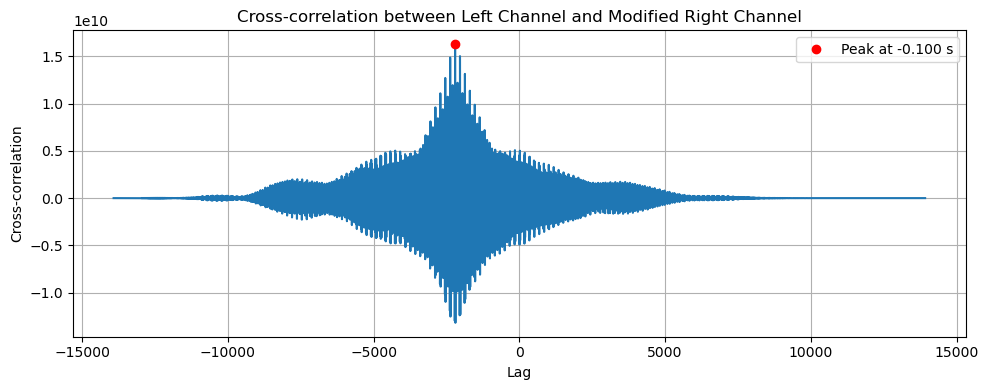

In [97]:

# Compute the cross-correlation
cross_corr = np.correlate(l_channel, r_channel_modified, mode='full')

# Create a time axis for the cross-correlation
time_cross_corr = np.arange(-len(l_channel) + 1, len(l_channel))


# Find the index of the peak in the cross-correlation
peak_index = np.argmax(cross_corr)

# Calculate the corresponding time shift
time_shift = time_cross_corr[peak_index] / sample_rate

# Plot the cross-correlation with the peak indicated
plt.figure(figsize=(10, 4))
plt.plot(time_cross_corr, cross_corr)
plt.plot(time_cross_corr[peak_index], cross_corr[peak_index], 'ro', label=f'Peak at {time_shift:.3f} s')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Left Channel and Modified Right Channel')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### T.3.7

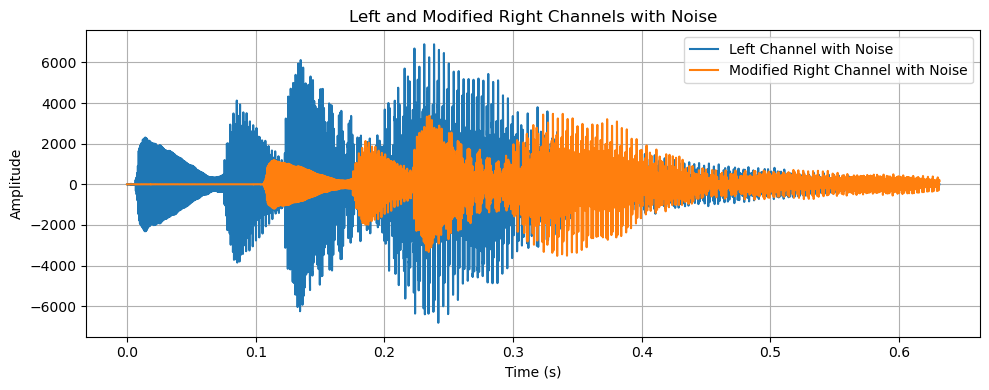

In [102]:
# Standard deviation of the noise
noise_std = 1

# Generate the noise samples
noise_l = np.random.normal(0, noise_std, len(l_channel))
noise_r = np.random.normal(0, noise_std, len(r_channel_modified))

# Add the noise to the left and modified right channels
l_channel_noisy = l_channel + noise_l
r_channel_modified_noisy = r_channel_modified + noise_r

# Create a time axis
time = np.arange(len(l_channel)) / sample_rate

# Plot the left and modified right channels with noise
plt.figure(figsize=(10, 4))
plt.plot(time, l_channel_noisy, label='Left Channel with Noise')
plt.plot(time, r_channel_modified_noisy, label='Modified Right Channel with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Left and Modified Right Channels with Noise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

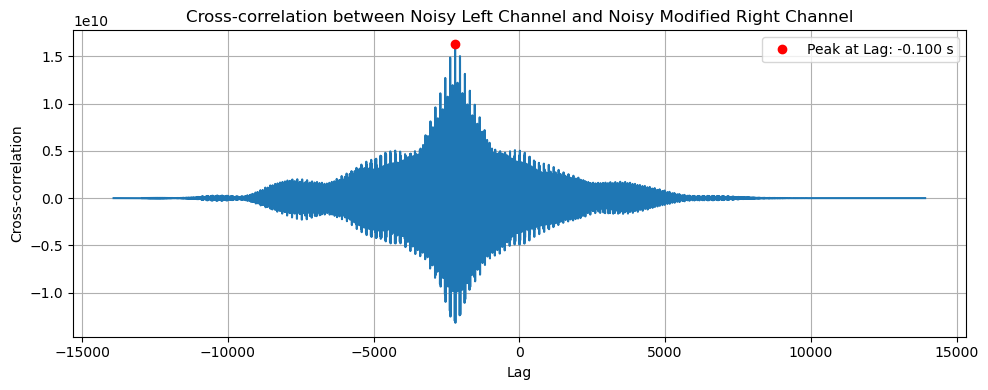

In [120]:
# Compute the cross-correlation on the noisy signals
cross_corr_noisy = np.correlate(l_channel_noisy, r_channel_modified_noisy, mode='full')

# Create a time axis for the cross-correlation
time_cross_corr_noisy = np.arange(-len(l_channel_noisy) + 1, len(l_channel_noisy))

# Find the index of the peak in the cross-correlation of the noisy signals
peak_index_noisy = np.argmax(cross_corr_noisy)

# Calculate the corresponding lag value (time shift)
lag_noisy = time_cross_corr_noisy[peak_index_noisy] / sample_rate

# Plot the cross-correlation of the noisy signals with the peak indicated
plt.figure(figsize=(10, 4))
plt.plot(time_cross_corr_noisy, cross_corr_noisy)
plt.plot(time_cross_corr_noisy[peak_index_noisy], cross_corr_noisy[peak_index_noisy], 'ro', label=f'Peak at Lag: {lag_noisy:.3f} s')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Noisy Left Channel and Noisy Modified Right Channel')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### R.3.1

In some sense yes. Like the FFT, the cross-correlation also need a certain length of two signals. But if we create a buffer and continuously compute the cross-correlation after recieving a certain length of signals, then it can be said that it is possible to implement the cross-correlation to an online data streaming. 

### R.3.2

### R.3.3
The codes are provided above.

## 4. Signal Filtering

### T.4.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sampling frequency
fs = 10000

# Time axis
t = np.arange(0, 0.1, 1/fs)

# Frequency and amplitude of the first sine wave
f1 = 50
A1 = 1

# Frequency and amplitude of the second sine wave
f2 = 500
A2 = 0.5

# Generate the signals
signal1 = A1 * np.sin(2*np.pi*f1*t)
signal2 = A2 * np.sin(2*np.pi*f2*t)

# Combine the signals
combined_signal = signal1 + signal2




### T.4.2

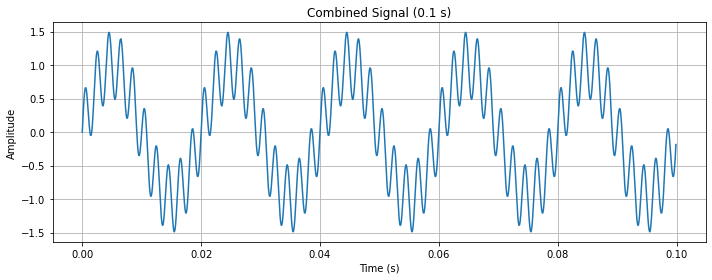

In [3]:
# Plot the combined signal over a time slot of 0.1 s
plt.figure(figsize=(10, 4))
plt.plot(t, combined_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Signal (0.1 s)')
plt.grid(True)
plt.tight_layout()
plt.show()


### T.4.3

H(s) = 1 / (1 + s / (2π*f_c)) with f_c=50Hz.

In order to design an analog low-pass passive filter we can a resistor and a capacitor connected in series with the resistor coming first. The formula for the cutoff frequency is f_c = 1/(2π*R*C). Therefor we can choose R=1kΩ for example and calculate the necessary C in order to get a cutoff frequency of 50Hz. Since it is likely that we will not be able to find a resistor or a capacitor with exactly the calculated specifications, we pick a standard resistor/capacitor value that is closest to the calculated one. With R=1kΩ and f_c=50Hz a capacitance of C=3.18μF is required for the low pass filter. 

### T.4.4

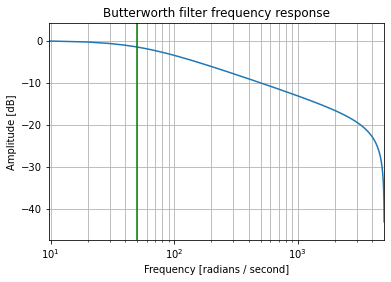

In [65]:
from scipy.signal import butter, filtfilt, lfilter
from scipy import signal

# Design the low-pass filter
fc = 50  # Cut-off frequency in Hz

b, a = butter(1, fc, btype='low', analog=False, fs=fs)

w, h = signal.freqz(b, a, fs=fs)
plt.semilogx(w, 10 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.show()

### T.4.5

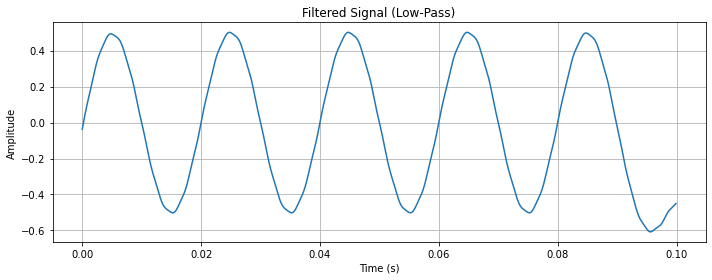

In [33]:
# Apply the low-pass filter to the original combined signal
filtered_signal = filtfilt(b, a, combined_signal)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal (Low-Pass)')
plt.grid(True)
plt.tight_layout()
plt.show()


### T.4.6

H(s) = s / (s + 2π*f_c) with f_c=500Hz

Similarly to T.4.3 we can once again use a Resistor and a capacitor to design such a high pass filter. The steps can be followed analog to the steps of T.4.3 with the exception of having a cutoff frequency of 500Hz and needing to switch the resistor and capacitor in the connection so the capacitor comes first. With R=1kΩ and f_c=500Hz a capacitance of C=318nF is required for the high-pass filter.

### T.4.7

C:\Users\micha\AppData\Local\Temp/ipykernel_22960/3187460572.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 10 * np.log10(abs(h)))


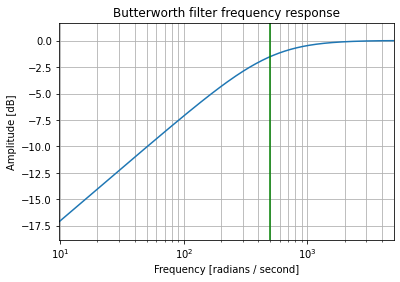

In [36]:
# Design the high-pass filter
fc = 500  # Cut-off frequency in Hz

b, a = butter(1, fc, btype='high', analog=False, fs=fs)

w, h = signal.freqz(b, a, fs=fs)
#print(any(h==0))
plt.semilogx(w, 10 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(fc, color='green') # cutoff frequency
plt.show()

### T.4.8 

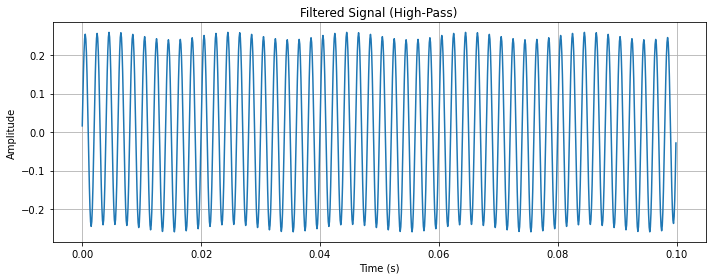

In [37]:
# Apply the high-pass filter to the original combined signal
filtered_signal = filtfilt(b, a, combined_signal)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal (High-Pass)')
plt.grid(True)
plt.tight_layout()
plt.show()


### T.4.9

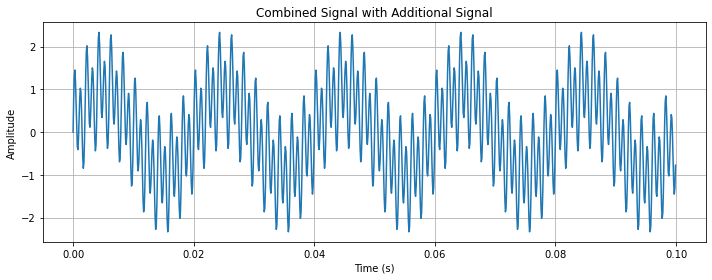

In [38]:
# Frequency and amplitude of the additional sine wave
f3 = 1000
A3 = 1

# Generate the additional signal
signal3 = A3 * np.sin(2*np.pi*f3*t)

# Combine the additional signal with the original combined signal
combined_signal_new = combined_signal + signal3

# Plot the combined signal with the additional signal
plt.figure(figsize=(10, 4))
plt.plot(t, combined_signal_new)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Signal with Additional Signal')
plt.grid(True)
plt.tight_layout()
plt.show()


### T.4.10

H(s) = (s / (Q * ω0)) / (s^2 + s / (Q * ω0) + ω0^2)


### T.4.11

C:\Users\micha\AppData\Local\Temp/ipykernel_22960/2429320664.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(w, 10 * np.log10(abs(h)))


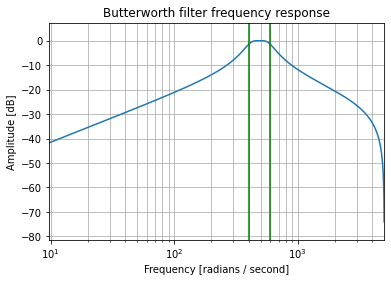

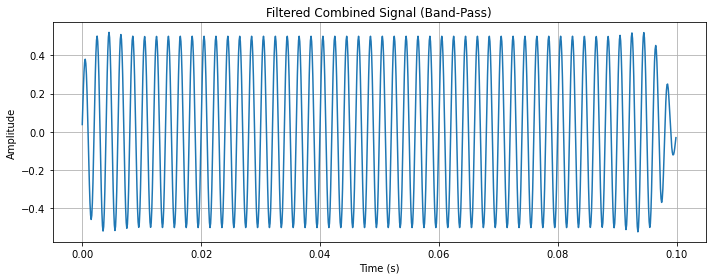

In [62]:
# Design the band-pass filter
f_center = 500  # Center frequency in Hz
bw = 100

low_cutoff = f_center - bw
high_cutoff = f_center + bw
b, a = butter(2, [low_cutoff, high_cutoff], btype='band', analog=False, fs=fs)

# Visualize the filter
w, h = signal.freqz(b, a, fs=fs)
plt.semilogx(w, 10 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(low_cutoff, color='green') # cutoff low
plt.axvline(high_cutoff, color='green') # cutoff high
plt.show()

# Apply the band-pass filter to the combined signal with the additional signal
filtered_signal = filtfilt(b, a, combined_signal_new)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Combined Signal (Band-Pass)')
plt.grid(True)
plt.tight_layout()
plt.show()


### T.4.12

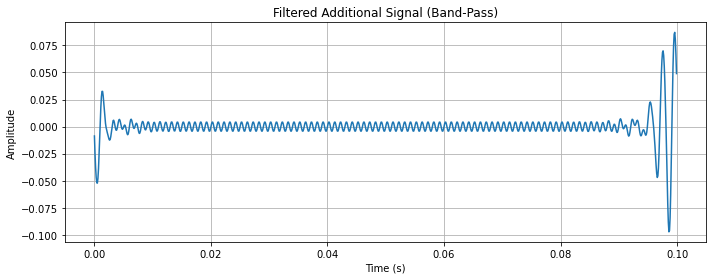

In [63]:
# Apply the band-pass filter to the additional signal
filtered_signal = filtfilt(b, a, signal3)

# Plot the filtered additional signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Additional Signal (Band-Pass)')
plt.grid(True)
plt.tight_layout()
plt.show()


### R.4.1

The description can be found in T.4.3, but the calculations and values are shown in the figure below as well as the drawing.

![R_4_1.png](./R_4_1.png)

### R.4.2

Given the transfer function of a first-order analog low-pass filter:

\begin{equation}
H_a(s) = \frac{1}{1 + sRC}
\end{equation}

where $s$ is the Laplace variable, $R$ is the resistor value, and $C$ is the capacitor value.

The cutoff frequency $f_c$ of this filter is given by:

\begin{equation}
f_c = \frac{1}{2\pi RC}
\end{equation}

We can express the resistor-capacitor product $RC$ in terms of the cutoff frequency $f_c$:

\begin{equation}
RC = \frac{1}{2\pi f_c}
\end{equation}

By using the bilinear transform (or Tustin's method), we replace $s$ in the continuous time (analog) transfer function with:

\begin{equation}
s = \frac{2}{T} \frac{z - 1}{z + 1}
\end{equation}

where $T$ is the sampling period ($T = 1/f_s$, $f_s$ is the sampling rate), and $z$ is the variable of the z-transform in the discrete time domain.

Substituting $s$ into $H_a(s)$, we get:

\begin{equation}
H_d(z) = \frac{1}{1 + \frac{2}{T} \frac{z - 1}{z + 1} \frac{1}{2\pi f_c}}
\end{equation}

Multiplying the numerator and the denominator by $(z+1)$ and simplifying, we get:

\begin{equation}
H_d(z) = \frac{z+1}{z + (1 - \frac{f_c T}{\pi})}
\end{equation}

The difference equation of the digital filter can be derived from the discrete time transfer function:

\begin{equation}
H_d(z) = \frac{z+1}{z + (1 - \frac{f_c T}{\pi})}
\end{equation}

This represents a difference equation in the Z domain. Multiplication by $z$ corresponds to a one-sample delay. Thus, we can translate this equation into the time domain as:

\begin{equation}
y[n] * (1 + 1 - \frac{f_c T}{\pi}) = x[n] + x[n-1]
\end{equation}

Rearranging this equation for $y[n]$ gives:

\begin{equation}
y[n] = \frac{x[n] + x[n-1] - y[n-1] * (1 - \frac{f_c T}{\pi})}{1 + 1 - \frac{f_c T}{\pi}}
\end{equation}

By defining $\alpha = 1 - \frac{f_c T}{\pi}$, the equation simplifies to:

\begin{equation}
y[n] = \frac{x[n] + x[n-1] - \alpha * y[n-1]}{1 - \alpha}
\end{equation}

### R.4.3

The description can be found in T.4.6, but the calculations and values are shown in the figure below as well as the drawing.

![R_4_3.png](./R_4_3.png)

### R.4.4

\begin{equation}
H_a(s) = \frac{sRC}{1 + sRC}
\end{equation}

We can express the resistor-capacitor product $RC$ in terms of the cutoff frequency $f_c$:

\begin{equation}
RC = \frac{1}{2\pi f_c}
\end{equation}

By using the bilinear transform (or Tustin's method), we replace $s$ in the continuous time (analog) transfer function with:

\begin{equation}
s = \frac{2}{T} \frac{z - 1}{z + 1}
\end{equation}

Substituting $s$ into $H_a(s)$, we get:

\begin{equation}
H_d(z) = \frac{\frac{2}{T} \frac{z - 1}{z + 1} \frac{1}{2\pi f_c}}{1 + \frac{2}{T} \frac{z - 1}{z + 1} \frac{1}{2\pi f_c}}
\end{equation}

Multiplying the numerator and the denominator by $(z+1)$ and simplifying, we get:

\begin{equation}
H_d(z) = \frac{z - 1}{z + (1 - \frac{f_c T}{\pi})}
\end{equation}

The difference equation of the digital filter can be derived from the discrete time transfer function:

\begin{equation}
H_d(z) = \frac{z - 1}{z + (1 - \frac{f_c T}{\pi})}
\end{equation}

This represents a difference equation in the Z domain. Multiplication by $z$ corresponds to a one-sample delay. Thus, we can translate this equation into the time domain as:

\begin{equation}
y[n] * (1 + 1 - \frac{f_c T}{\pi}) = x[n] - x[n-1]
\end{equation}

Rearranging this equation for $y[n]$ gives:

\begin{equation}
y[n] = \frac{x[n] - x[n-1] + y[n-1] * (1 - \frac{f_c T}{\pi})}{1 + 1 - \frac{f_c T}{\pi}}
\end{equation}

By defining $\alpha = 1 - \frac{f_c T}{\pi}$, the equation simplifies to:

\begin{equation}
y[n] = \frac{x[n] - x[n-1] + \alpha * y[n-1]}{1 - \alpha}
\end{equation}

For a cutoff frequency of 500Hz, and a sampling frequency $f_s = 10000$Hz such that $T = 1/f_s$, the alpha parameter is computed as:

\begin{equation}
\alpha = 1 - \frac{500}{\pi \times 10000}
\end{equation}

The resulting difference equation is:

\begin{equation}
y[n] = \frac{x[n] - x[n-1] + \alpha * y[n-1]}{1 - \alpha}
\end{equation}

This can now be used to filter a data stream sample by sample.

### R.4.5

Starting out by specifying the desired configurations of our bandpass, we define all the necessary values and use then a multiple feedback topology template with fixed values for $C_1$ and $C_2$ that is tuned for the center frequency $\omega_0 = 1 \frac{rad}{s}$ and calculate $R_1$, $R_2$, $R_3$, $R_4$. In step 2 we need to tune the the values to fit the desired center frequency of $f_0=500 Hz$ or $\omega_0 = 2\pi \cdot f_0 = 3142 \frac{rad}{s}$. Using the equation:

\begin{equation}
f_0 = \frac{1}{2\pi R C}
\end{equation}

it is obvious that we need to scale the calcuted $R$ values by dividing them with the desired $\omega_0$. Afterwards this leaves just step 3, where we make use of the fact that we can pick a scaling factor by which we multiply $R$ and divide $C$ (or vice versa) and attain more convenient component values. This is also demonstrated in the before stated equation. In reality, this scaling factor needs to be optimized, such that the resulting component values approximately match standard component values.

Source: Operational Amplifiers and Linear Integrated Circuits: Theory and Application; Chapter 11, section 7 written by James Fiore, first published in 1992.

![R_4_5.png](./R_4_5.png)

### R.4.7
The main difference between passive and active filters is that passive filters are build solely by using passive components like resistances, inductances and capacitances whereas active filters incorporate active components, which primarily are operational amplifiers. Opposed to passive filters, active filters require an external power source to operate. The frequency response of the passive filter is determined only by the values of the components, they have therefor limited gain and only passively filter the signal. Active filters can provide a much wider range of gain and actively amplify the signal. The frequency response is determined by the used components, but also the selected amplifier gain.

### R.4.8

Infinite Impulse Response (IIR) and Finite Impulse Response (FIR) are two main types of digital filters. IIR filters extend indefinitely and could become unstable if not properly designed, but they are more efficient as they require fewer coefficients. They have a feedback loop and can have a nonlinear phase response that may distort signals.

On the other hand, FIR filters have a finite response, are always stable, and can be designed to have a linear phase response, preserving the signal shape. They are simpler to design but usually require more coefficients, thus needing more memory and computational power. They have no feedback loop, and their output is a function of current and past inputs.

### R.4.9

The order of a filter can be understood as the number of previous inputs (for FIR) or outputs (for IIR) that are required in the filter's difference equation.

### R.4.10

A continuous-time filter could be implemented via analog circuits. For example, a RC circuit acts as a low-pass filter.

### R.4.11

A discrete-time filter can be implemented via a board computer, which samples the input signal with an ADC and then outputs the result at another digital port.

### R.4.13

No, since this wouldn't respect Nyquist sampling law

### R.4.14

The code can be found in this notebook